In [5]:
import sys
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import plot as pltfn
from sklearn.cluster import KMeans
import network as netfn
import admin_functions as adfn
#plt.style.use('dark_background')
sns.reset_orig()
%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


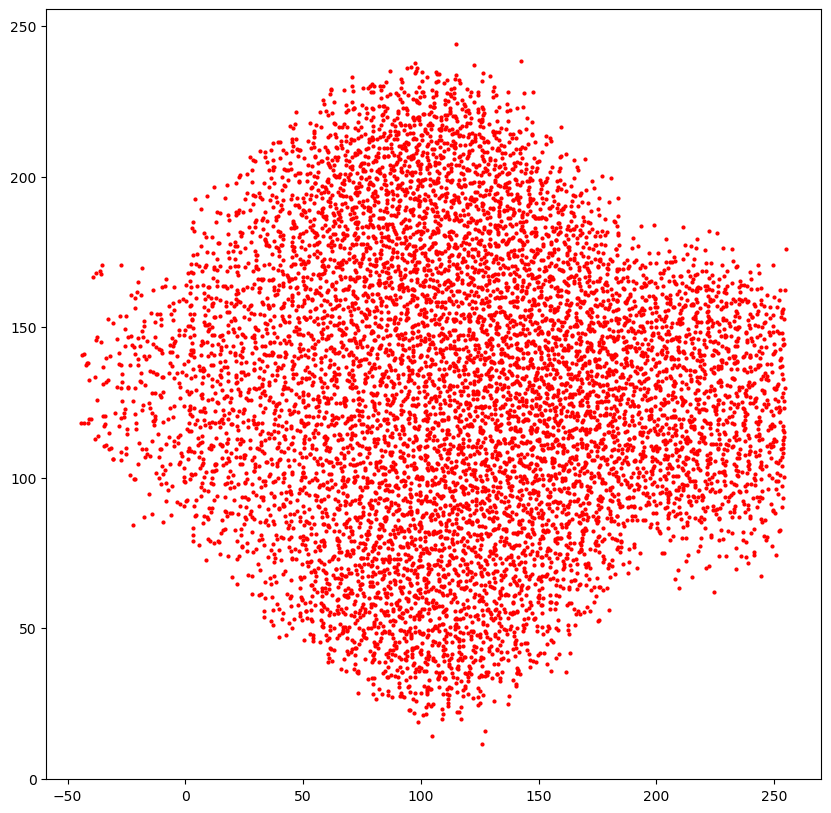

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import copy

# Node coordinates
#---------------------------------------------------------------------------
os.chdir(Fdrop + 'Project/' + experiment)
node = sorted(glob.glob('knodes*'))
fig,axarr = plt.subplots(figsize = (10,10))
nodes = np.load(node[0])
axarr.scatter(nodes[:,0], nodes[:,1], s = 4, color = 'red' , alpha = 1)
plt.show()

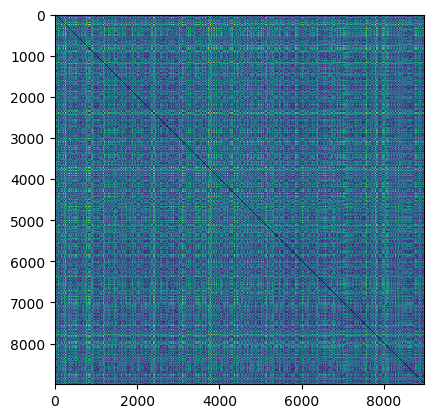

In [6]:
#K LOG + P LOG SCALE 
import numpy as np
import matplotlib.pyplot as plt
p_vals = np.geomspace(0.001, 1, 20)
k_vals = np.geomspace(1/nodes.shape[0], 0.5, 20)
cell_locs = nodes
dist = euclidean_distances(nodes)
plt.imshow(dist)
plt.show()

In [7]:
savepath = F10t + 'Project/' + experiment + os.sep 

#k and p
#===================================
from scipy import sparse
import scipy
import networkx as nx
for i in range(len(k_vals)):
    for e in range(len(p_vals)):
        output = netfn.netsim(dist).ws_generate(k_vals[i], p_vals[e], 'directed')
        sparse_A = sparse.csr_matrix(output.A)
        scipy.sparse.save_npz(savepath + 'smallsweep-klog-plog-network-k' + str(k_vals[i]) + '-p' + str(p_vals[e]) + '-' + str(e+1), sparse_A)
        mat = output.A
        G = nx.from_numpy_matrix(mat)
        cyc = nx.algorithms.cycle_basis(G)
        edge =  np.sum(output.A)
        cyc_vec = np.zeros(len(cyc))
        for t in range(len(cyc)):
            cyc_vec[t] = len(cyc[t])
        cyc_list = [np.unique(cyc_vec, return_counts=True),len(cyc),edge]
        np.save(savepath + 'smallsweep-klog-plog-network-k-' +  str(k_vals[i]) + '-p' + str(p_vals[e]) + '-' + str(e+1) + '-cycles.npy', cyc_list)